<a href="https://colab.research.google.com/github/ChetanKrishna07/Weather_prediction/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE3054 - Data Mining Concepts and Techniques
### Name: Chetan Krishna
### Reg No: 20BCE0338
### Q. No.: 3 --> Weather
### Dataset link : https://www.kaggle.com/datasets/ananthr1/weather-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/datasets/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


### Data Pre-processing

In [3]:
data.drop("date", axis=1, inplace=True)
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [4]:
data.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
data.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [6]:
def label_encode(x):
  if x == "rain":
    return 0
  elif x == "sun":
    return 1
  elif x == "fog":
    return 2
  elif x == "drizzle":
    return 3
  else:
    return 4

In [7]:
data['label'] = data['weather'].map(label_encode)
data.head()

,precipitation,temp_max,temp_min,wind,weather,label
0,0.0,12.8,5.0,4.7,drizzle,3
1,10.9,10.6,2.8,4.5,rain,0
2,0.8,11.7,7.2,2.3,rain,0
3,20.3,12.2,5.6,4.7,rain,0
4,1.3,8.9,2.8,6.1,rain,0


[]

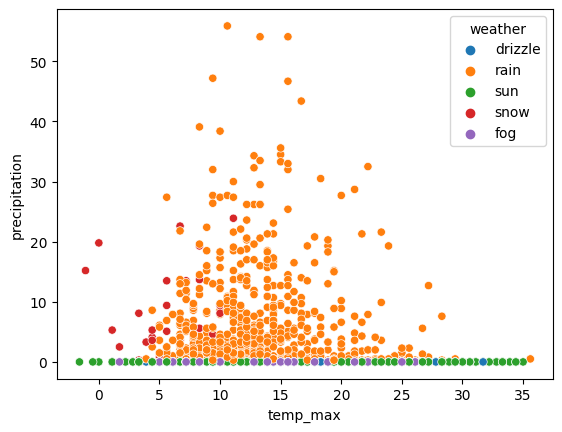

In [8]:
sns.scatterplot(data=data, x="temp_max", y="precipitation", hue="weather")
plt.plot()

[]

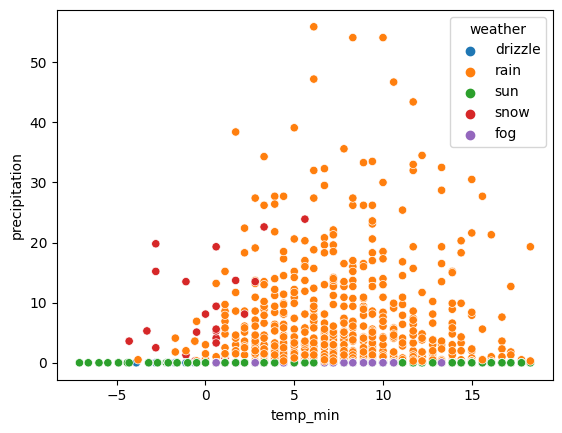

In [9]:
sns.scatterplot(data=data, x="temp_min", y="precipitation", hue="weather")
plt.plot()

[]

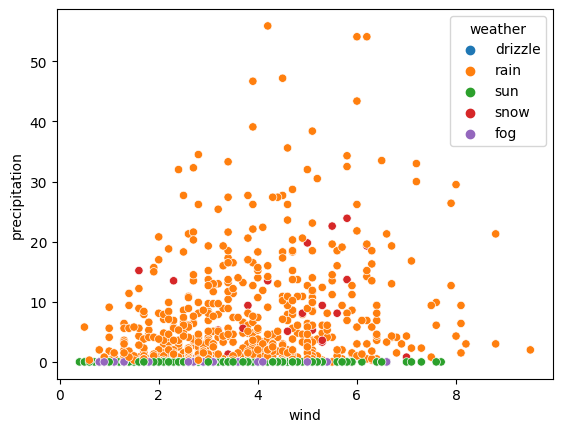

In [10]:
sns.scatterplot(data=data, x="wind", y="precipitation", hue="weather")
plt.plot()

[]

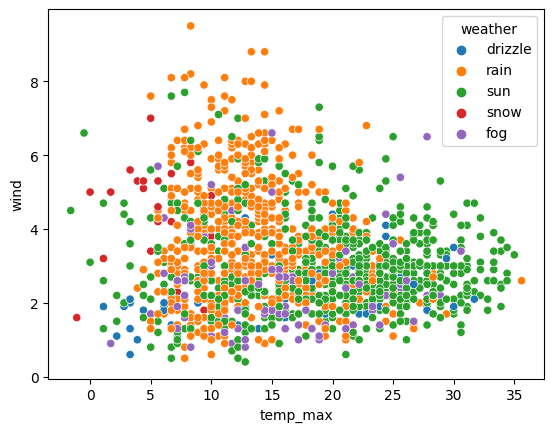

In [11]:
sns.scatterplot(data=data, x="temp_max", y="wind", hue="weather")
plt.plot()

[]

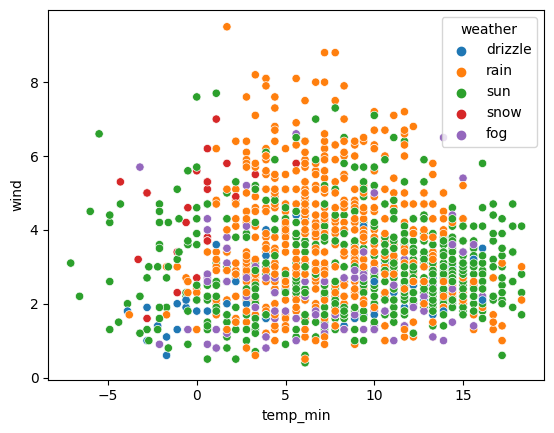

In [12]:
sns.scatterplot(data=data, x="temp_min", y="wind", hue="weather")
plt.plot()

[]

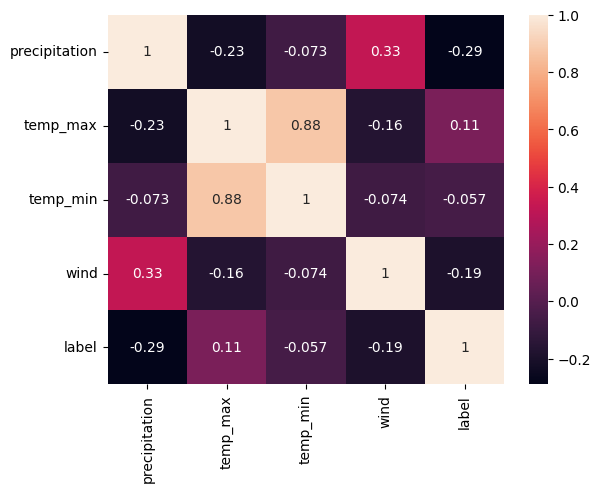

In [13]:
sns.heatmap(data.corr(), annot=True)
plt.plot()

In [14]:
# drop temp_max as temp_min and temp_max are highly correlated
X = data.drop(["weather", "label", "temp_max"], axis=1).values
y = data.label.values
X.shape, y.shape

((1461, 3), (1461,))

## Classification

In [15]:
# Splitting Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((1168, 3), (1168,), (293, 3), (293,))

### SVM

In [16]:
from sklearn.svm import SVC

model1 = SVC()
model1.fit(X_train, y_train)

SVC()

In [17]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, model1.predict(X_test)))

Accuracy:  0.7542662116040956


In [18]:


model2 = SVC(kernel='linear')
model2.fit(X_train, y_train)

print("Accuracy: ", accuracy_score(y_test, model2.predict(X_test)))

Accuracy:  0.8088737201365188


In [19]:
model3 = SVC(kernel='poly')
model3.fit(X_train, y_train)

print("Accuracy: ", accuracy_score(y_test, model3.predict(X_test)))

Accuracy:  0.7133105802047781


#### Best Accuracy for SVM (linear kernel): 81% 

### Decision Tree




In [20]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

print("Accuracy: ", accuracy_score(y_test, dtree.predict(X_test)))

Accuracy:  0.7337883959044369


### Random Forest


In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

print("Accuracy: ", accuracy_score(y_test, rfc.predict(X_test)))

Accuracy:  0.7747440273037542


### Accuracy List:
- SVM (rbf kernel): 75.4%
- SVM (linear kernel): 81%
- SVM (polynomial kernel): 71.3%
- Decision Tree: 74.1%
- Random Forest (100 estimators): 77.1%

#### Best Accuracy: SVM (linear kernel)

## Clustering

### KMeans

In [22]:
from sklearn.cluster import KMeans

# Elbow curve for finding optimal clusters

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

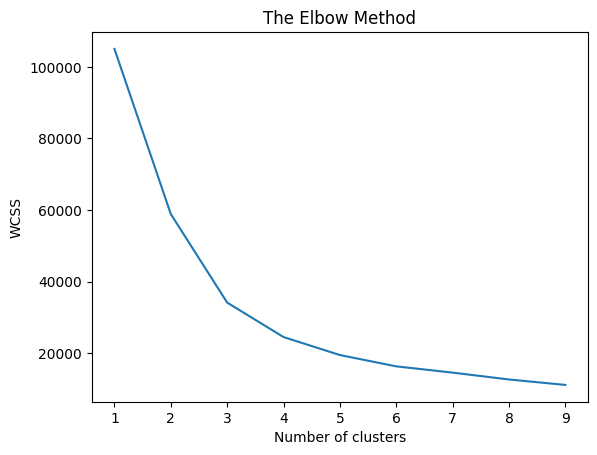

In [23]:
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow curve we can see that optimal number of clusters is 3

In [24]:
KMModel = KMeans(n_clusters=3, random_state=0)
KMModel.fit(X)
clusters = KMModel.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

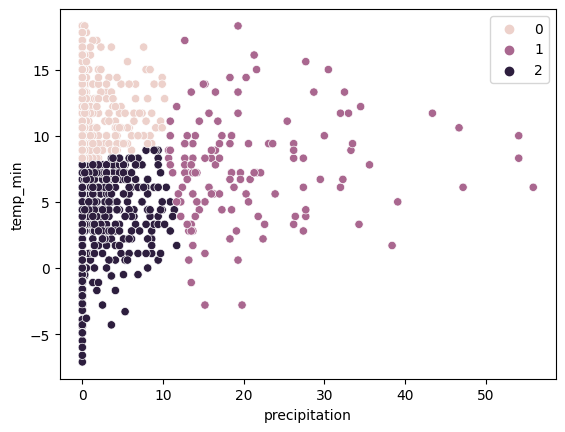

In [26]:
sns.scatterplot(data=data, x="precipitation", y="temp_min", hue=clusters)
plt.show()

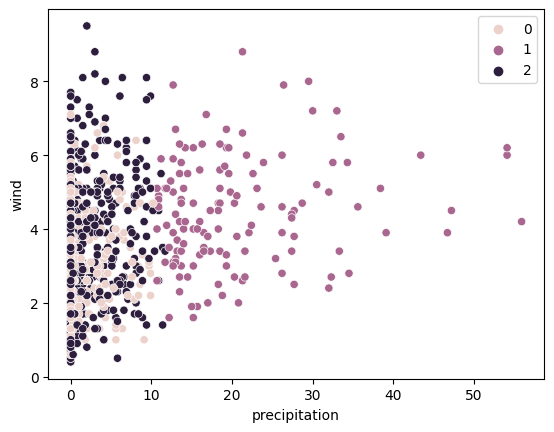

In [28]:
sns.scatterplot(data=data, x="precipitation", y="wind", hue=clusters)
plt.show()

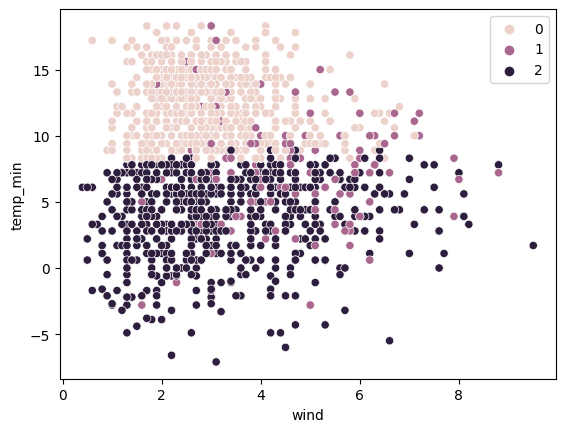

In [29]:
sns.scatterplot(data=data, x="wind", y="temp_min", hue=clusters)
plt.show()

### Hierarical Clustering

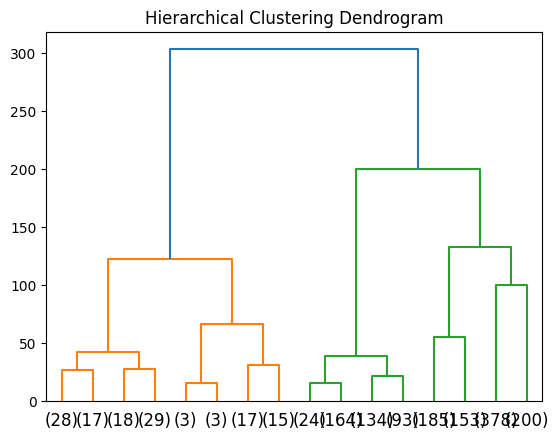

In [30]:
# Dendrogram
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

hierModel = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hierModel.fit(X)

plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(hierModel, truncate_mode="level", p=3)
plt.show()

We can see the optimal number of clusters is 3

In [31]:
hierModel = AgglomerativeClustering(n_clusters=3)
hierModel.fit(X)
clusters = hierModel.labels_

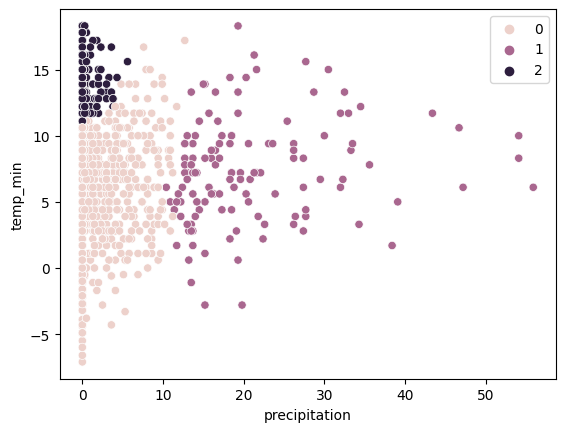

In [32]:
sns.scatterplot(data=data, x="precipitation", y="temp_min", hue=clusters)
plt.show()

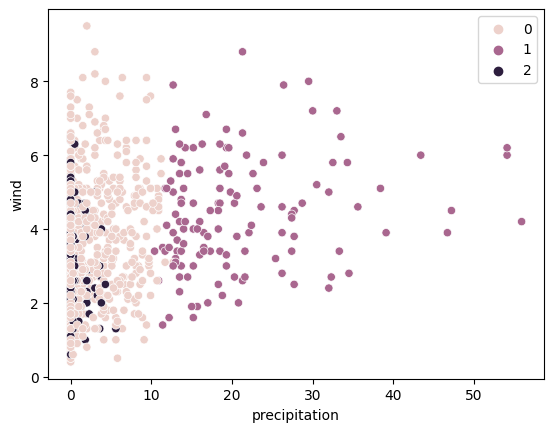

In [33]:
sns.scatterplot(data=data, x="precipitation", y="wind", hue=clusters)
plt.show()

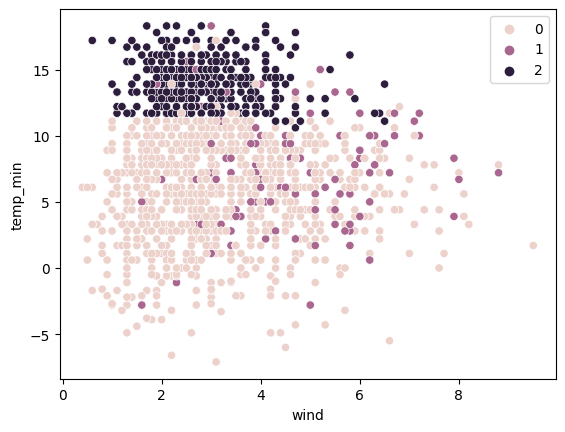

In [34]:
sns.scatterplot(data=data, x="wind", y="temp_min", hue=clusters)
plt.show()

Code link: https://github.com/ChetanKrishna07/Weather_prediction